# PACKAGE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# DATA

In [3]:
train_path = '/kaggle/input/join-data-train/train_full.csv'

In [4]:
train = pd.read_csv(train_path)

In [5]:
# Ganti string kosong ("") dengan NaN di seluruh DataFrame
train.replace("", pd.NA, inplace=True)

# Mengganti pd.NA dengan np.nan
train = train.fillna(np.nan)

# EDA DATA

In [6]:
train.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,ID_Mesin,...,Vibration-2,Power,Power_Backup,Status,Priority,Area,Last Maintenance,Status Sparepart,Age,Country Machine
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,40.938353,NaN,Yes,Warning,Medium,SRBY,2021-05-05,Broken,8.0,JP
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,NaN,311.803841,Yes,Normal,Medium,BKS,2020-10-09,Ready,11.0,JP
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,46.980726,1257.681079,No,Normal,High,SKBM,2020-02-12,On Check,1.0,KR
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,54.860603,478.325694,No,Breakdown,Medium,KRWG,2021-01-24,Broken,12.0,JP
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,NaN,674.159077,Yes,Breakdown,Medium,BPN,2021-10-22,In Use,2.0,US


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000000 entries, 0 to 12999999
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  float64
 2   temperature_10H_min (°C)  float64
 3   temperature-1             float64
 4   temperature-2             float64
 5   temperature-3             float64
 6   apparent_temperature_max  float64
 7   apparent_temperature_min  float64
 8   ID_Area                   object 
 9   ID_Mesin                  object 
 10  timestamp                 object 
 11  humidity                  float64
 12  Voltage-L                 float64
 13  Voltage-R                 float64
 14  Voltage-M                 float64
 15  Current-M                 float64
 16  Current-R                 float64
 17  Current-T                 float64
 18  RPM                       float64
 19  RPM-1                     float64
 20  RPM-2                 

# NA&OUTLIER

## NA Handling

- Drop na data

In [8]:
data_train = train.dropna()

Drop kolom tidak penting
- ID_Area
- ID_Mesin

In [9]:
# Menghapus kolom 'ID_Area' dan 'ID_Mesin'
data_train = data_train.drop(columns=['ID_Area', 'ID_Mesin'])

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429841 entries, 2 to 12999963
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Transaction            429841 non-null  object 
 1   temperature_10H_max (°C)  429841 non-null  float64
 2   temperature_10H_min (°C)  429841 non-null  float64
 3   temperature-1             429841 non-null  float64
 4   temperature-2             429841 non-null  float64
 5   temperature-3             429841 non-null  float64
 6   apparent_temperature_max  429841 non-null  float64
 7   apparent_temperature_min  429841 non-null  float64
 8   timestamp                 429841 non-null  object 
 9   humidity                  429841 non-null  float64
 10  Voltage-L                 429841 non-null  float64
 11  Voltage-R                 429841 non-null  float64
 12  Voltage-M                 429841 non-null  float64
 13  Current-M                 429841 non-null  floa

In [11]:
def analyze_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n=== Missing Values Analysis ===")
    print(missing_df[missing_df['Missing Values'] > 0])

In [12]:
analyze_missing_values(data_train)


=== Missing Values Analysis ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [13]:
data_train.columns

Index(['ID_Transaction', 'temperature_10H_max (°C)',
       'temperature_10H_min (°C)', 'temperature-1', 'temperature-2',
       'temperature-3', 'apparent_temperature_max', 'apparent_temperature_min',
       'timestamp', 'humidity', 'Voltage-L', 'Voltage-R', 'Voltage-M',
       'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3',
       'Vibration-1', 'Vibration-2', 'Power', 'Power_Backup', 'Status',
       'Priority', 'Area', 'Last Maintenance', 'Status Sparepart', 'Age',
       'Country Machine'],
      dtype='object')

Tidak ada data hilang (NA) pada data

In [14]:
print(type(data_train))
print(data_train.shape)

<class 'pandas.core.frame.DataFrame'>
(429841, 31)


In [15]:
#reset index
data_train = data_train.reset_index(drop=True)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429841 entries, 0 to 429840
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Transaction            429841 non-null  object 
 1   temperature_10H_max (°C)  429841 non-null  float64
 2   temperature_10H_min (°C)  429841 non-null  float64
 3   temperature-1             429841 non-null  float64
 4   temperature-2             429841 non-null  float64
 5   temperature-3             429841 non-null  float64
 6   apparent_temperature_max  429841 non-null  float64
 7   apparent_temperature_min  429841 non-null  float64
 8   timestamp                 429841 non-null  object 
 9   humidity                  429841 non-null  float64
 10  Voltage-L                 429841 non-null  float64
 11  Voltage-R                 429841 non-null  float64
 12  Voltage-M                 429841 non-null  float64
 13  Current-M                 429841 non-null  f

## Outlier Handling

In [17]:
def replace_values_above_threshold(data_train, column, threshold):
    sns.boxplot(data_train[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_train[column] > threshold
    data_train.loc[above_threshold, column] = threshold

    sns.boxplot(data_train[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_train

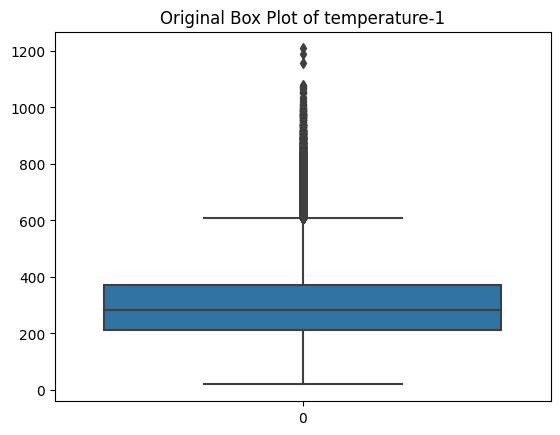

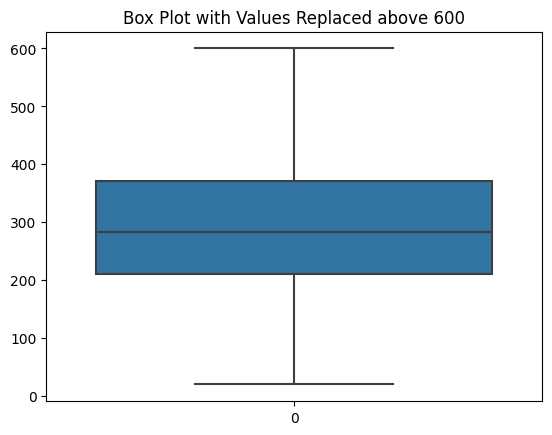

In [18]:
threshold_value = 600
train_features = replace_values_above_threshold(data_train, 'temperature-1', threshold_value)

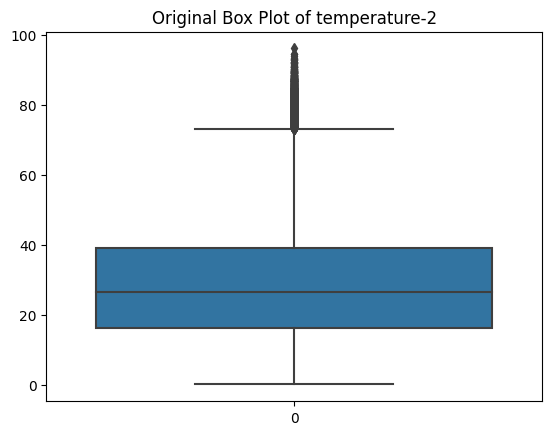

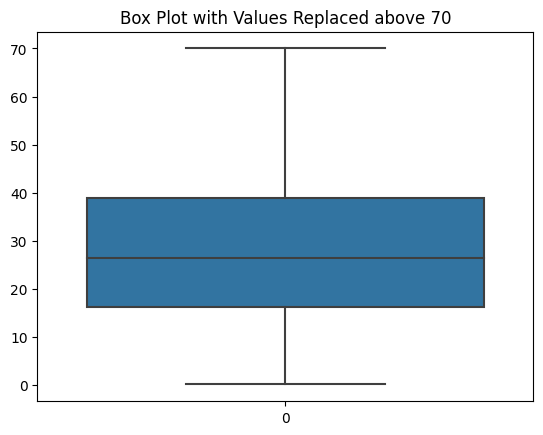

In [19]:
threshold_value = 70
train_features = replace_values_above_threshold(data_train, 'temperature-2', threshold_value)

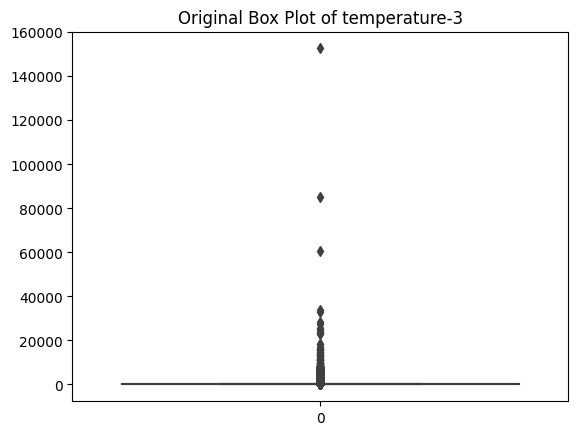

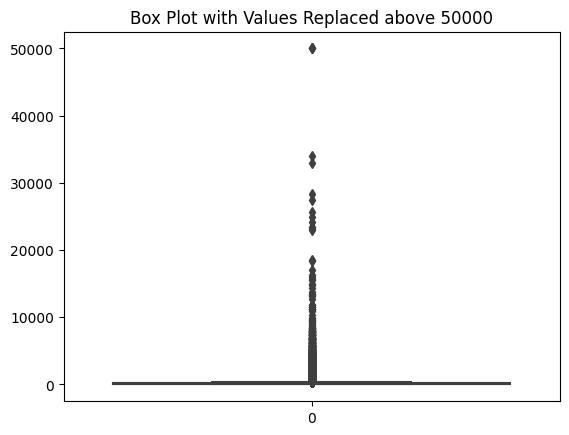

In [20]:
threshold_value = 50000
train_features = replace_values_above_threshold(data_train, 'temperature-3', threshold_value)

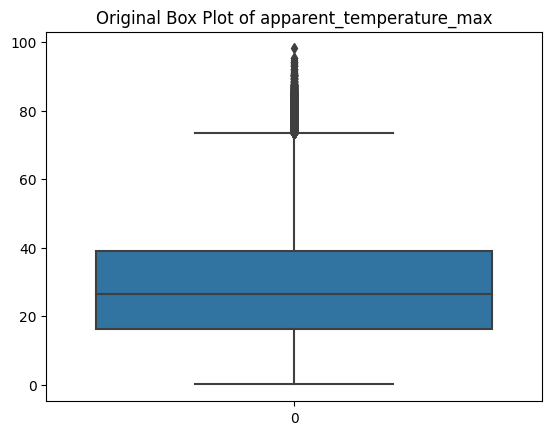

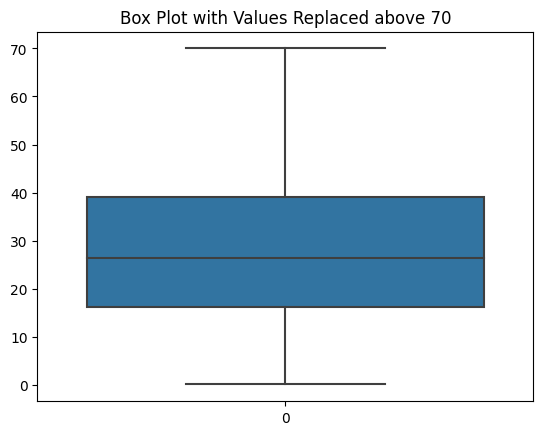

In [21]:
threshold_value = 70
train_features = replace_values_above_threshold(data_train, 'apparent_temperature_max', threshold_value)

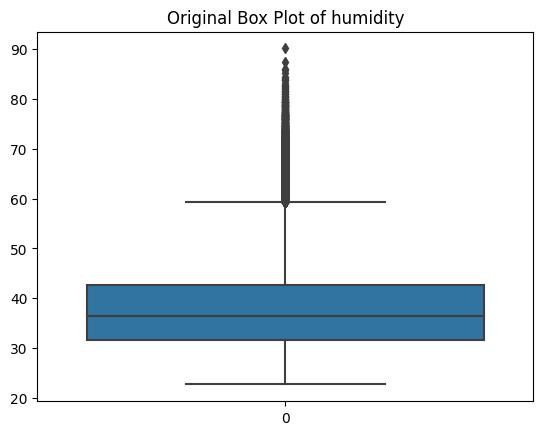

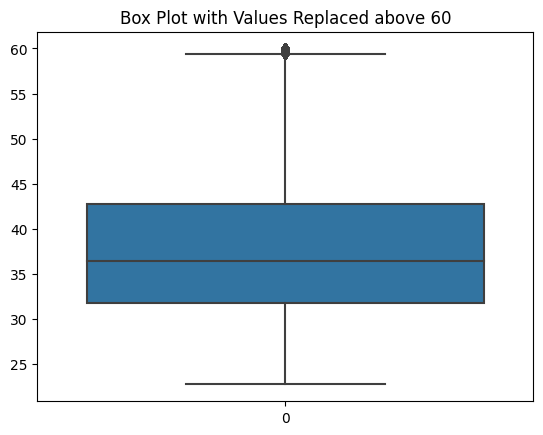

In [22]:
threshold_value = 60
train_features = replace_values_above_threshold(data_train, 'humidity', threshold_value)

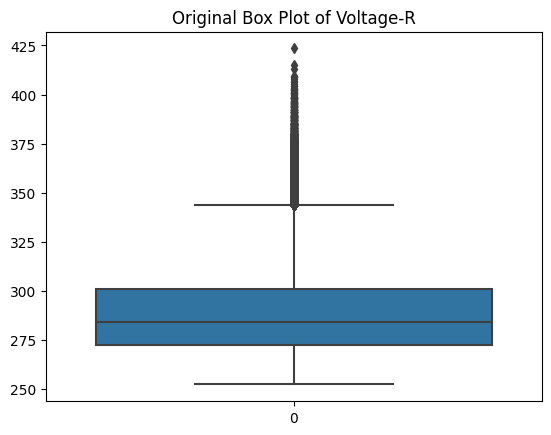

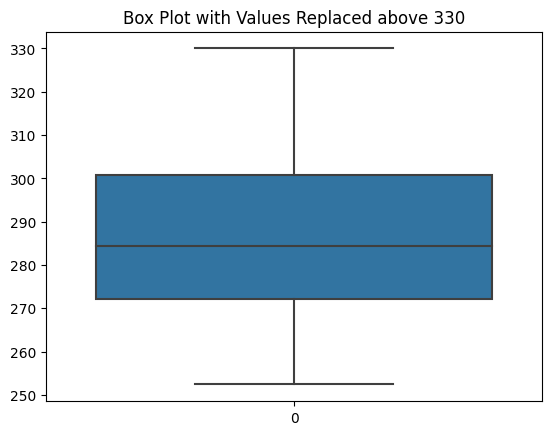

In [23]:
threshold_value = 330
train_features = replace_values_above_threshold(data_train, 'Voltage-R', threshold_value)

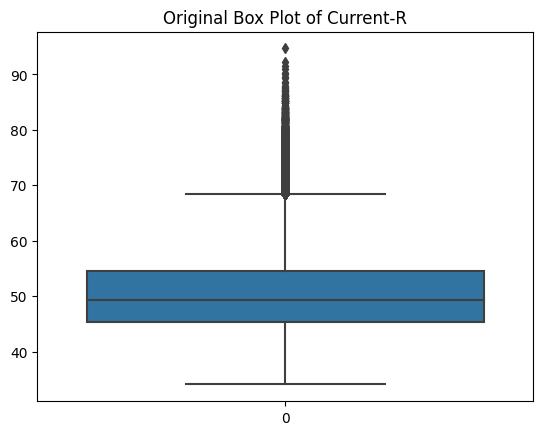

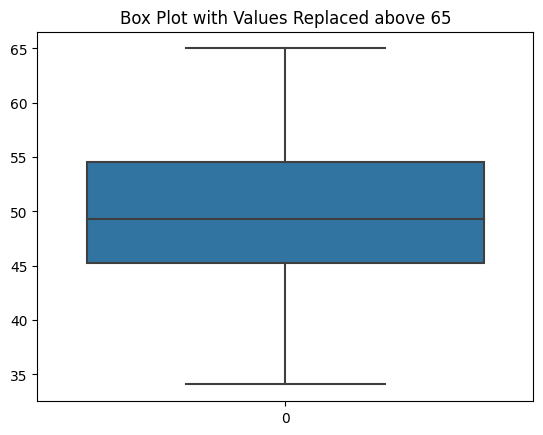

In [24]:
threshold_value = 65
train_features = replace_values_above_threshold(data_train, 'Current-R', threshold_value)

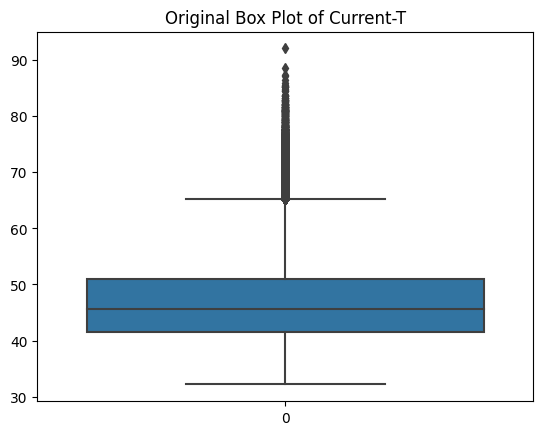

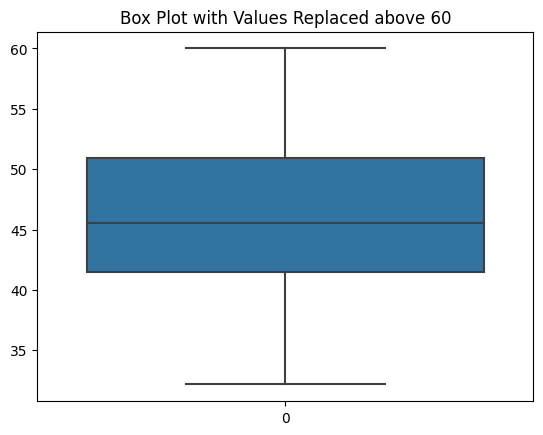

In [25]:
threshold_value = 60
train_features = replace_values_above_threshold(data_train, 'Current-T', threshold_value)

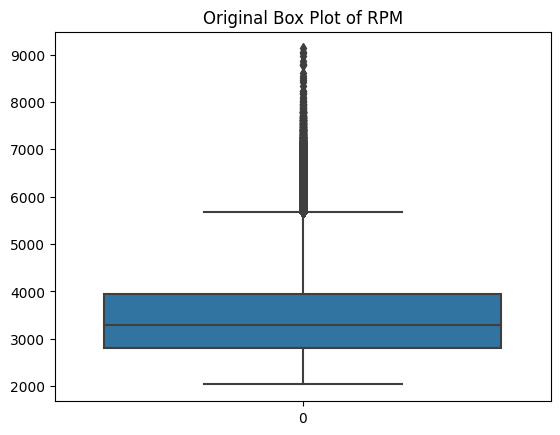

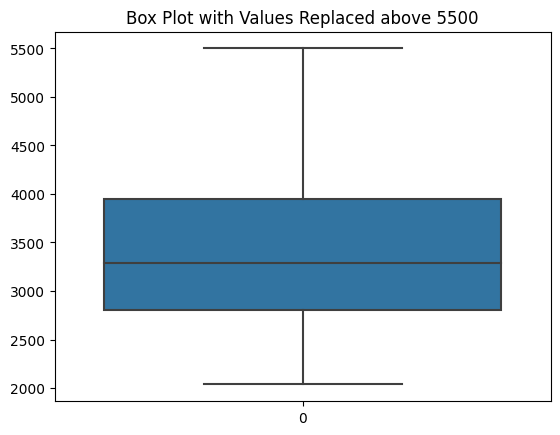

In [26]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_train, 'RPM', threshold_value)

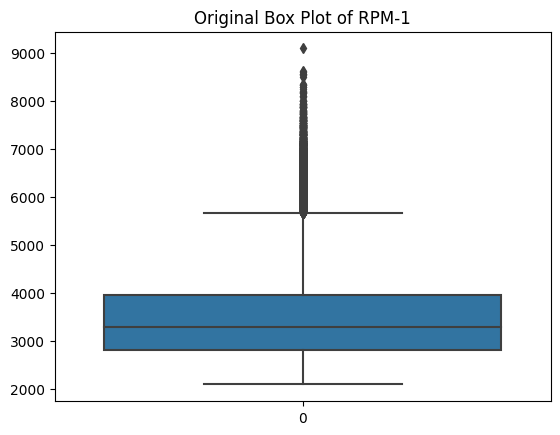

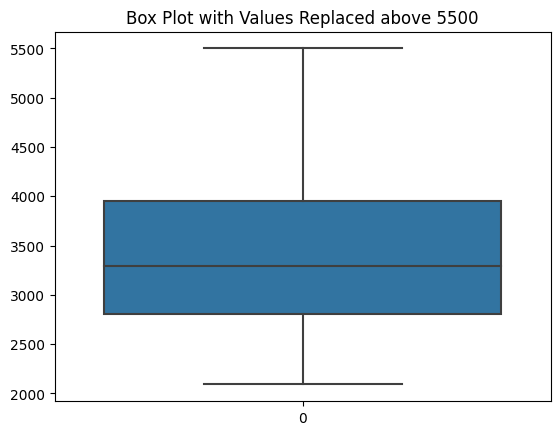

In [27]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_train, 'RPM-1', threshold_value)

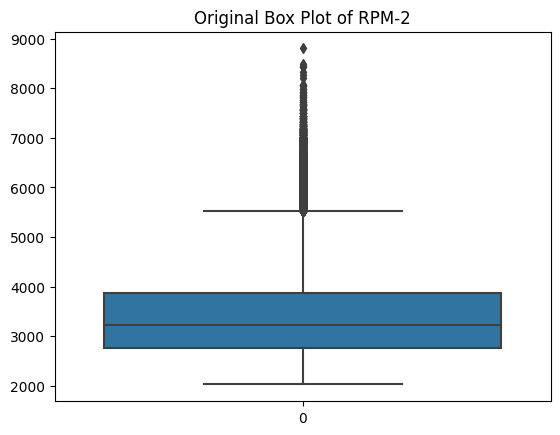

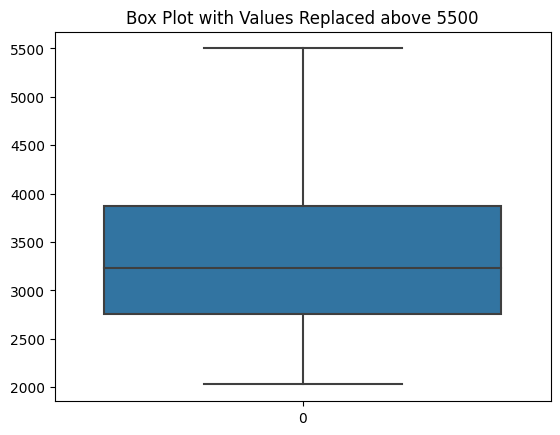

In [28]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_train, 'RPM-2', threshold_value)

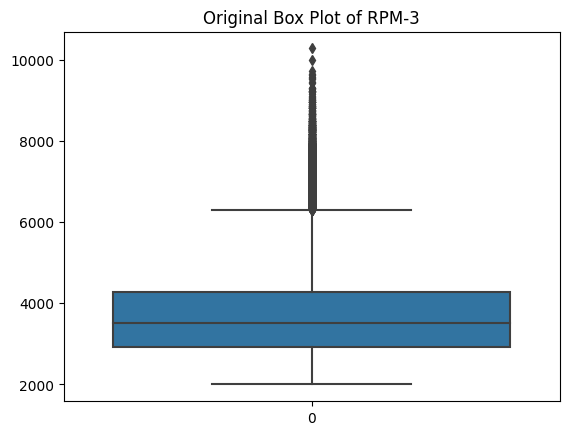

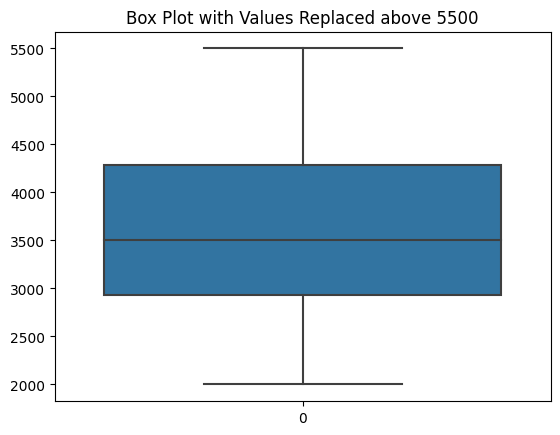

In [29]:
threshold_value = 5500
train_features = replace_values_above_threshold(data_train, 'RPM-3', threshold_value)

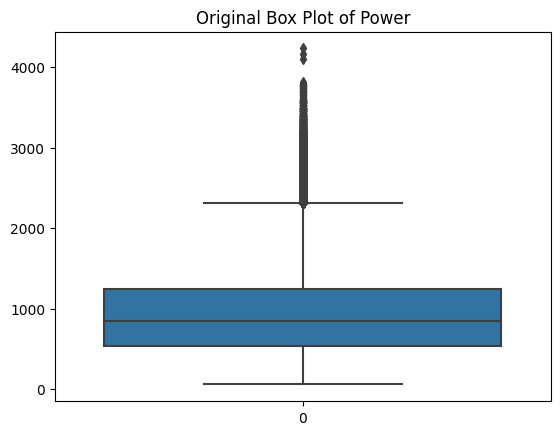

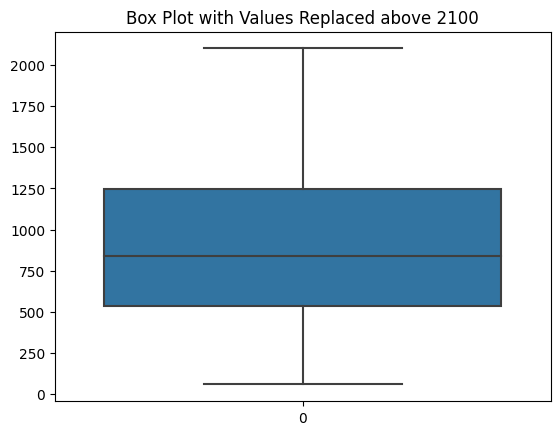

In [30]:
threshold_value = 2100
train_features = replace_values_above_threshold(data_train, 'Power', threshold_value)

In [31]:
def replace_values_above_threshold(data_train, column, threshold):
    sns.boxplot(data_train[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_train[column] < threshold
    data_train.loc[above_threshold, column] = threshold

    sns.boxplot(data_train[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_train

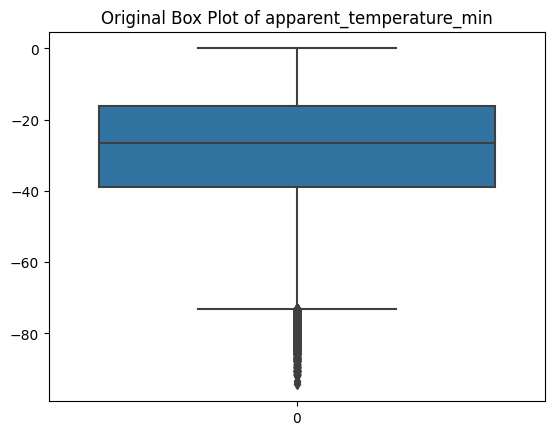

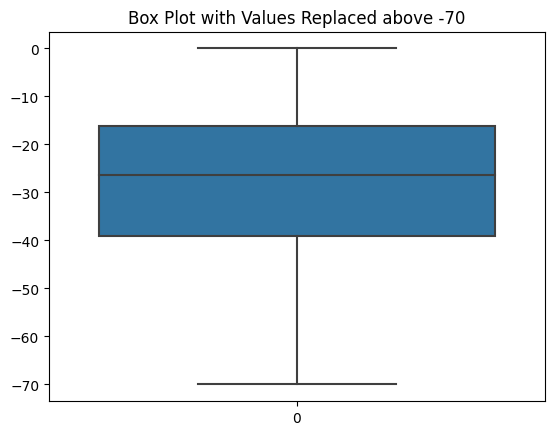

In [32]:
threshold_value = -70
train_features = replace_values_above_threshold(data_train, 'apparent_temperature_min', threshold_value)

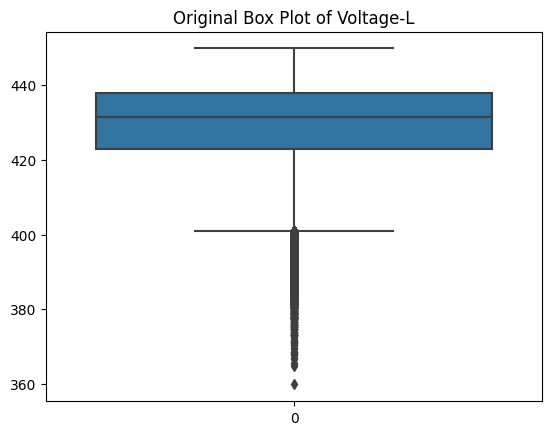

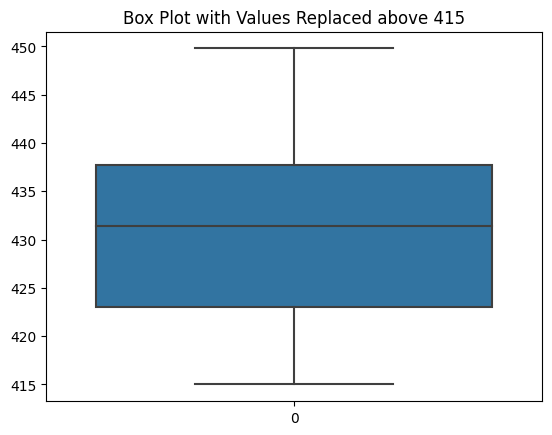

In [33]:
threshold_value = 415
train_features = replace_values_above_threshold(data_train, 'Voltage-L', threshold_value)

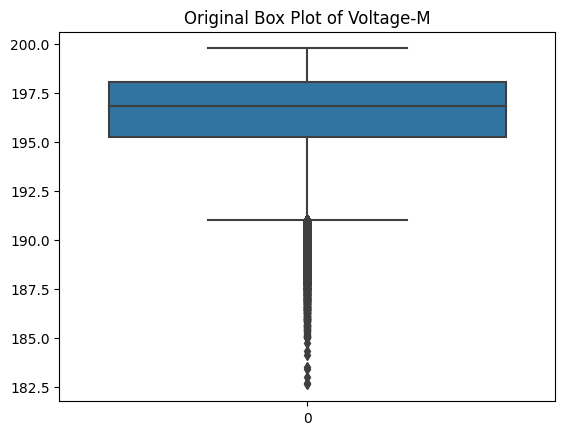

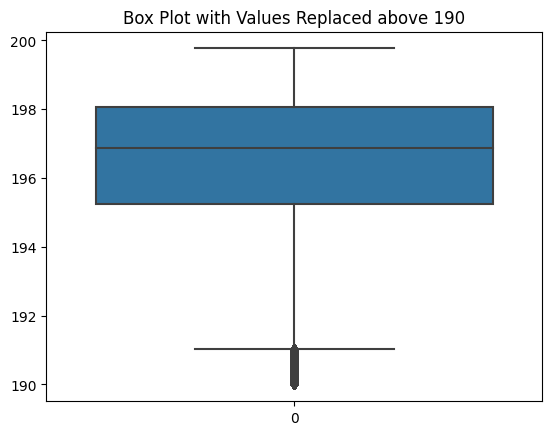

In [34]:
threshold_value = 190
train_features = replace_values_above_threshold(data_train, 'Voltage-M', threshold_value)

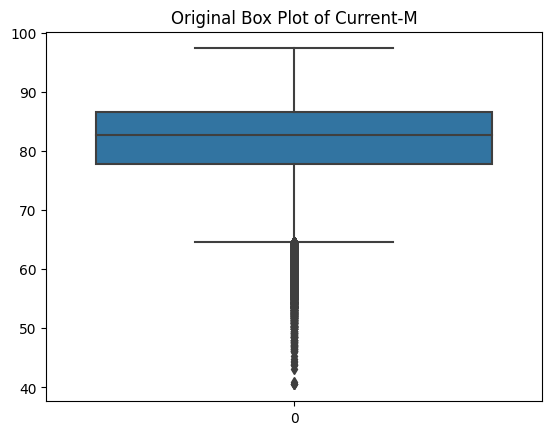

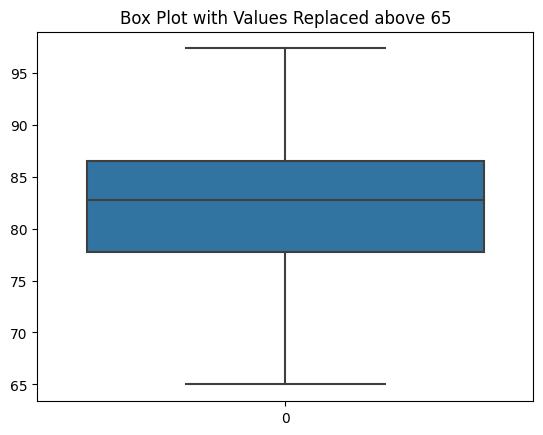

In [35]:
threshold_value = 65
train_features = replace_values_above_threshold(data_train, 'Current-M', threshold_value)

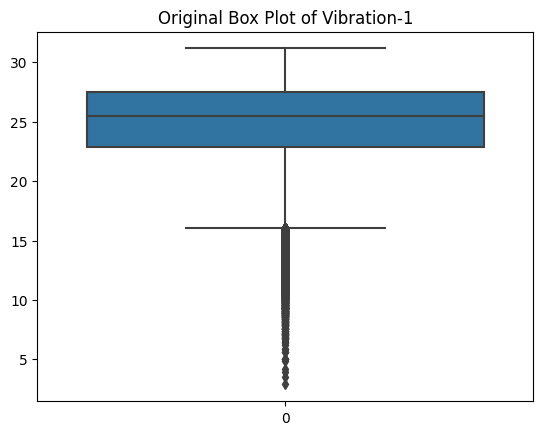

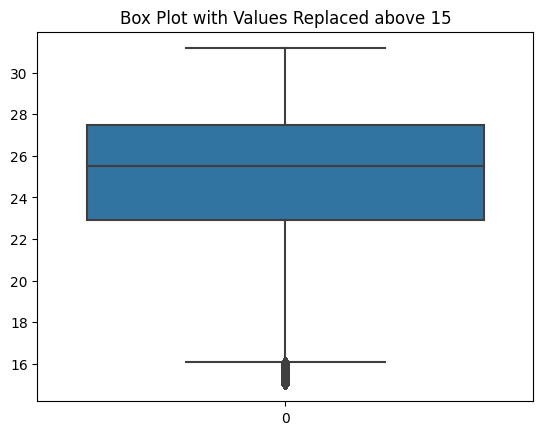

In [36]:
threshold_value = 15
train_features = replace_values_above_threshold(data_train, 'Vibration-1', threshold_value)

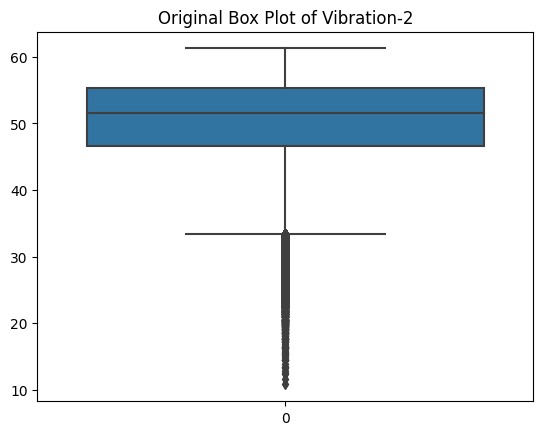

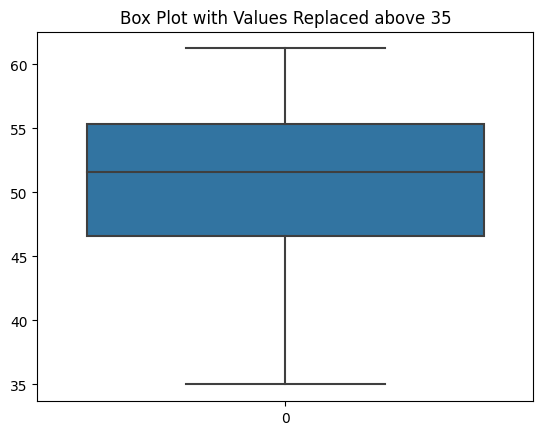

In [37]:
threshold_value = 35
train_features = replace_values_above_threshold(data_train, 'Vibration-2', threshold_value)

In [38]:
def replace_values_above_threshold(data_train, column, threshold):
    sns.boxplot(data_train[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    above_threshold = data_train[column] > threshold
    data_train.loc[above_threshold, column] = threshold

    sns.boxplot(data_train[column])
    plt.title(f'Box Plot with Values Replaced above {threshold}')
    plt.show()

    return data_train

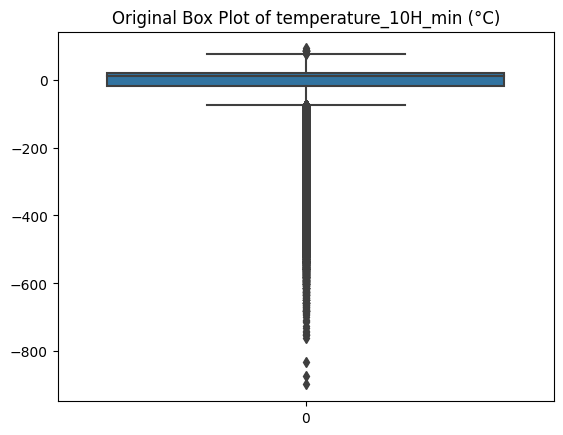

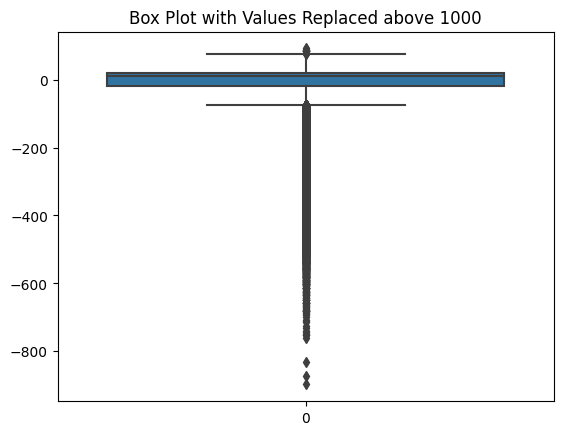

In [39]:
threshold_value = 1000
train_features = replace_values_above_threshold(data_train, 'temperature_10H_min (°C)', threshold_value)

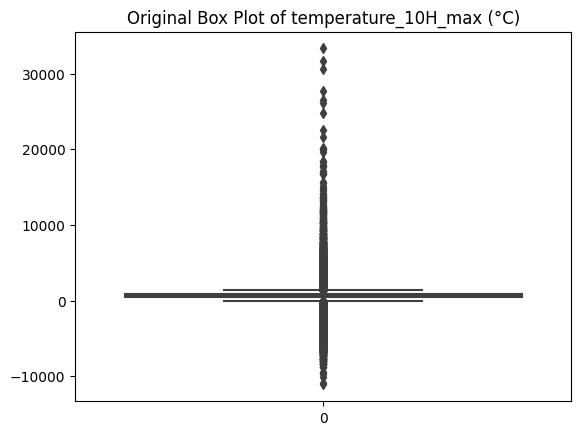

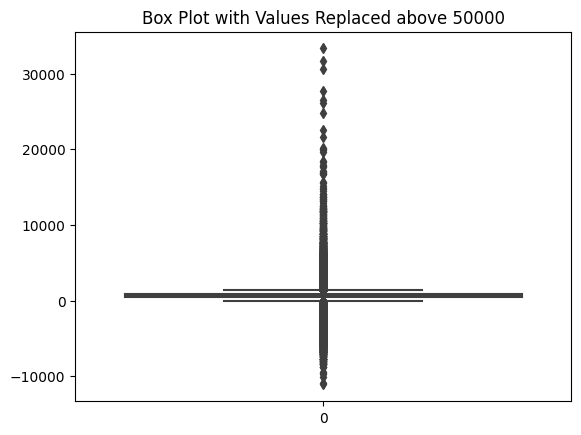

In [40]:
threshold_value = 50000
train_features = replace_values_above_threshold(data_train, 'temperature_10H_max (°C)', threshold_value)

In [41]:
# data_train.to_csv('/kaggle/working/clean_data.csv', index=False)

# FEATURE ENGINEERING

In [42]:
data_train.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,Vibration-2,Power,Power_Backup,Status,Priority,Area,Last Maintenance,Status Sparepart,Age,Country Machine
0,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,2024-09-04 03:31:00,51.354324,...,46.980726,1257.681079,No,Normal,High,SKBM,2020-02-12,On Check,1.0,KR
1,TRX112cc8a7f645b6d4789ef79f6642385e,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,2023-08-20 19:26:00,30.374734,...,46.290059,1111.606726,No,Normal,High,PLKG,2021-03-28,Repair,10.0,US
2,TRXeed266799f0b36d71c6b9e553fe92fe8,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,2023-04-09 06:40:00,28.297122,...,56.068452,1002.906615,Yes,Normal,Medium,JGJ,2020-01-17,Empty,2.0,US
3,TRX7d71ddcbdf632abb75acb88e250b415a,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,2023-11-28 05:16:00,28.524163,...,47.617070,1092.322256,No,Normal,Low,BLJA,2020-11-09,Broken,2.0,CN
4,TRXeb4b4d61c47861a65221d9cfe98d78e0,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,2024-12-09 22:50:00,50.104089,...,50.333706,1579.461935,No,Normal,Low,LMPG,2020-11-09,Broken,2.0,CN


## New Feature

- Kolom jam, hari, dan bulan dari timestamp
- Kolom jam, hari, dan bulan dari Last Maintenance
- Lama jarak bulan dari Last Maintenance ke sekarang

In [43]:
def analyze_timestamp(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month

In [44]:
analyze_timestamp(data_train)

<Axes: xlabel='hour', ylabel='Count'>

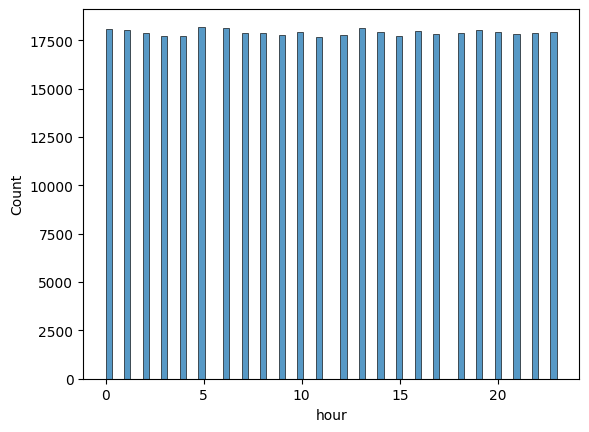

In [45]:
sns.histplot(data=data_train, x="hour")

<Axes: xlabel='day', ylabel='Count'>

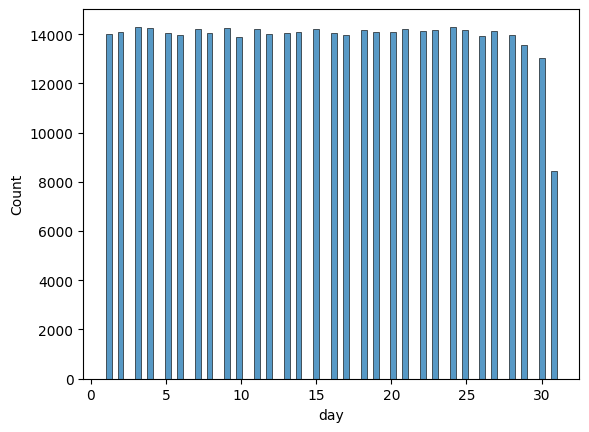

In [46]:
sns.histplot(data=data_train, x="day")

<Axes: xlabel='month', ylabel='Count'>

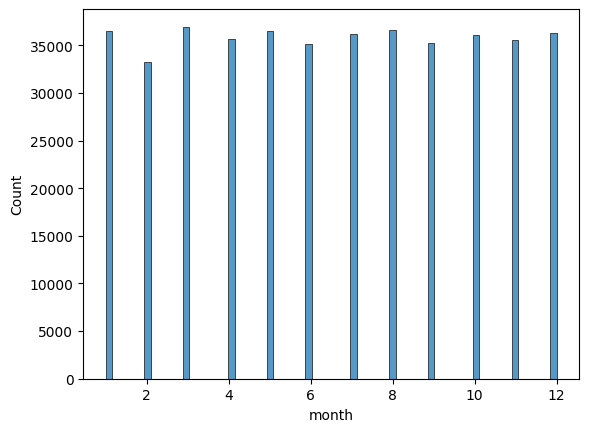

In [47]:
sns.histplot(data=data_train, x="month")

<Axes: xlabel='hour', ylabel='count'>

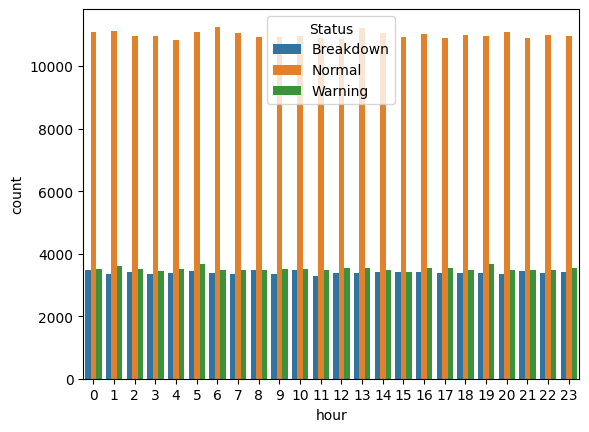

In [48]:
# Hourly distribution
hourly_data = data_train.groupby(['hour', 'Status']).size().reset_index(name='count')
sns.barplot(data=hourly_data, x='hour', y='count', hue='Status')

<Axes: xlabel='day', ylabel='count'>

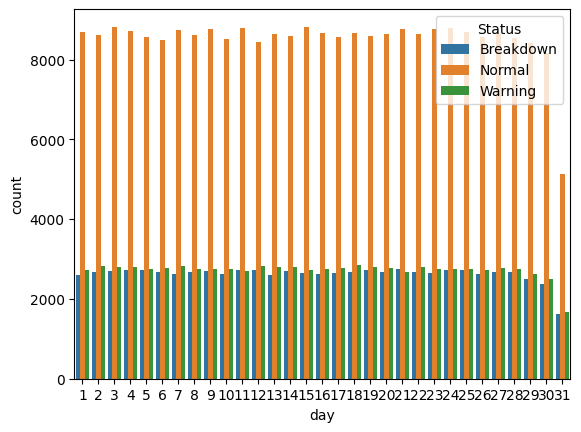

In [49]:
# Daily distribution
daily_data = data_train.groupby(['day', 'Status']).size().reset_index(name='count')
sns.barplot(data=daily_data, x='day', y='count', hue='Status')

<Axes: xlabel='month', ylabel='count'>

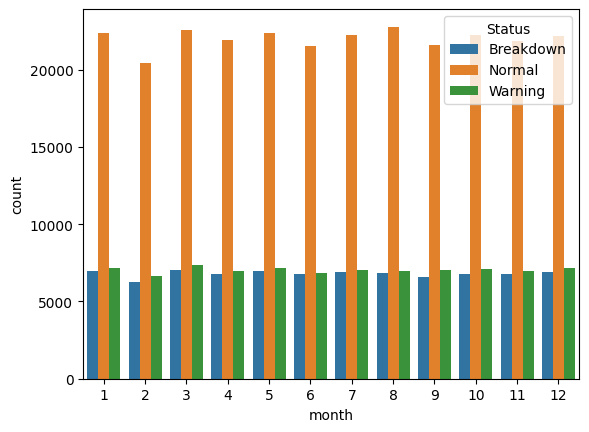

In [50]:
# Monthly distribution
monthly_data = data_train.groupby(['month', 'Status']).size().reset_index(name='count')
sns.barplot(data=monthly_data, x='month', y='count', hue='Status')

In [51]:
def last_maintenance(df):
    df['Last Maintenance'] = pd.to_datetime(df['Last Maintenance'])
    df['hour_maintenance'] = df['Last Maintenance'].dt.hour
    df['day_maintenance'] = df['Last Maintenance'].dt.day
    df['month_maintenance'] = df['Last Maintenance'].dt.month

In [52]:
last_maintenance(data_train)

In [53]:
def maintenance_distance(df):
    df['month_distance'] = (df['timestamp'].dt.year - df['Last Maintenance'].dt.year) * 12 + \
                           (df['timestamp'].dt.month - df['Last Maintenance'].dt.month)
    return df

In [54]:
data_train = maintenance_distance(data_train)

<Axes: xlabel='month_distance', ylabel='Count'>

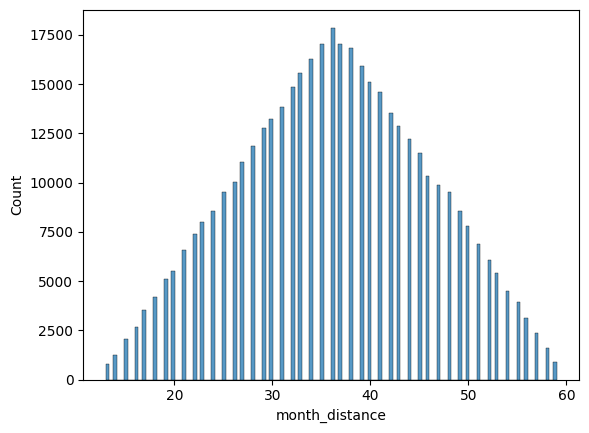

In [55]:
sns.histplot(data=data_train, x="month_distance")

#### Cek Kategori

In [56]:
data_train['Country Machine'].value_counts()

Country Machine
CN    103950
KR     97649
US     91419
JP     86746
TW     50077
Name: count, dtype: int64

In [57]:
data_train['Power_Backup'].value_counts()

Power_Backup
Yes    215097
No     214744
Name: count, dtype: int64

In [58]:
data_train['Priority'].value_counts()

Priority
Low       162780
Medium    150458
High      116603
Name: count, dtype: int64

In [59]:
data_train['Area'].value_counts()

Area
JGJ     24580
BNTN    23761
BGR     21716
TGR     21407
BPN     21361
BKS     21220
SKBM    21042
PLKG    20687
SRBY    20465
BDG     20418
MLG     20317
KRWG    20255
MKS     20132
KLT     19926
BFMG    19806
SMGS    19622
KDR     19605
LMPG    18909
SRG     17642
MKSR    17584
SDA      9710
BLJA     9676
Name: count, dtype: int64

Saran penanganan
- Bagi jadi jawa/luar jawa
- Bagi Jabodetabek/bukan
- Area tidak digunakan karena sudah direpresentasikan kolom 'Priority'any

In [60]:
data_train['Status Sparepart'].value_counts()

Status Sparepart
Broken      76378
On Check    74670
In Use      74017
Repair      73885
Empty       68337
Ready       62554
Name: count, dtype: int64

## Bining

- Kolom apakah itu hari weekend/tidak
- Kolom apakah itu akhir bulan atau tidak
- Kolom kategori waktu apakah pagi, siang, atau malam
- Kolom bulan

In [61]:
# Mengkategorikan hari sebagai weekend atau bukan
def categorize_day(day):

    if day % 7 in [6, 0]:
        return 1  # Weekend
    else:
        return 0  # Bukan Weekend

In [62]:
data_train['weekend'] = data_train['day'].apply(categorize_day).astype(int)

In [63]:
def categorize_end_of_month(day):
    # Mengkategorikan hari sebagai akhir bulan
    if day == 31:
        return 1  # Akhir bulan
    else:
        return 0  # Bukan akhir bulan

In [64]:
data_train['end_month'] = data_train['day'].apply(categorize_end_of_month).astype(int)

In [65]:
# Mengkategorikan jam menjadi pagi, siang, malam
def categorize_hour(hour):
    if hour < 12:
        return '1' #Pagi
    elif hour < 18:
        return '2' #Siang
    else:
        return '3' #Malam

In [66]:
data_train['time_of_day'] = data_train['hour'].apply(categorize_hour).astype(int)

#### Drop Colum Not Use

In [67]:
data_train.columns

Index(['ID_Transaction', 'temperature_10H_max (°C)',
       'temperature_10H_min (°C)', 'temperature-1', 'temperature-2',
       'temperature-3', 'apparent_temperature_max', 'apparent_temperature_min',
       'timestamp', 'humidity', 'Voltage-L', 'Voltage-R', 'Voltage-M',
       'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3',
       'Vibration-1', 'Vibration-2', 'Power', 'Power_Backup', 'Status',
       'Priority', 'Area', 'Last Maintenance', 'Status Sparepart', 'Age',
       'Country Machine', 'hour', 'day', 'month', 'hour_maintenance',
       'day_maintenance', 'month_maintenance', 'month_distance', 'weekend',
       'end_month', 'time_of_day'],
      dtype='object')

In [68]:
train_new = data_train.copy()

In [69]:
train_new.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,hour,day,month,hour_maintenance,day_maintenance,month_maintenance,month_distance,weekend,end_month,time_of_day
0,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,2024-09-04 03:31:00,51.354324,...,3,4,9,0,12,2,55,0,0,1
1,TRX112cc8a7f645b6d4789ef79f6642385e,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,2023-08-20 19:26:00,30.374734,...,19,20,8,0,28,3,29,1,0,3
2,TRXeed266799f0b36d71c6b9e553fe92fe8,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,2023-04-09 06:40:00,28.297122,...,6,9,4,0,17,1,39,0,0,1
3,TRX7d71ddcbdf632abb75acb88e250b415a,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,2023-11-28 05:16:00,28.524163,...,5,28,11,0,9,11,36,1,0,1
4,TRXeb4b4d61c47861a65221d9cfe98d78e0,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,2024-12-09 22:50:00,50.104089,...,22,9,12,0,9,11,49,0,0,3


## Encoding

#### Ordinal Encoding

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
order_priority = ['Low', 'Medium', 'High']
priority_encoder = OrdinalEncoder(categories=[order_priority])

# Melakukan encoding
train_new['Priority'] = priority_encoder.fit_transform(train_new[['Priority']])

In [72]:
train_new['Priority'] = train_new['Priority'].astype(int)

In [73]:
train_new['Priority'].value_counts()

Priority
0    162780
1    150458
2    116603
Name: count, dtype: int64

In [74]:
order_status = ['Normal', 'Warning', 'Breakdown']
status_encoder = OrdinalEncoder(categories=[order_status])

# Melakukan encoding
train_new['Status'] = status_encoder.fit_transform(train_new[['Status']])

In [75]:
train_new['Status'] = train_new['Status'].astype(int)

In [76]:
train_new['Status'].value_counts()

Status
0    264014
1     84339
2     81488
Name: count, dtype: int64

#### Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
# Kolom yang akan di-label encoding
columns_to_encode = ['Power_Backup', 'Status Sparepart', 'Country Machine']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom yang ditentukan
for column in columns_to_encode:
    train_new[column] = label_encoder.fit_transform(train_new[column])

In [79]:
train_new.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,hour,day,month,hour_maintenance,day_maintenance,month_maintenance,month_distance,weekend,end_month,time_of_day
0,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,2024-09-04 03:31:00,51.354324,...,3,4,9,0,12,2,55,0,0,1
1,TRX112cc8a7f645b6d4789ef79f6642385e,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,2023-08-20 19:26:00,30.374734,...,19,20,8,0,28,3,29,1,0,3
2,TRXeed266799f0b36d71c6b9e553fe92fe8,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,2023-04-09 06:40:00,28.297122,...,6,9,4,0,17,1,39,0,0,1
3,TRX7d71ddcbdf632abb75acb88e250b415a,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,2023-11-28 05:16:00,28.524163,...,5,28,11,0,9,11,36,1,0,1
4,TRXeb4b4d61c47861a65221d9cfe98d78e0,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,2024-12-09 22:50:00,50.104089,...,22,9,12,0,9,11,49,0,0,3


In [80]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429841 entries, 0 to 429840
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_Transaction            429841 non-null  object        
 1   temperature_10H_max (°C)  429841 non-null  float64       
 2   temperature_10H_min (°C)  429841 non-null  float64       
 3   temperature-1             429841 non-null  float64       
 4   temperature-2             429841 non-null  float64       
 5   temperature-3             429841 non-null  float64       
 6   apparent_temperature_max  429841 non-null  float64       
 7   apparent_temperature_min  429841 non-null  float64       
 8   timestamp                 429841 non-null  datetime64[ns]
 9   humidity                  429841 non-null  float64       
 10  Voltage-L                 429841 non-null  float64       
 11  Voltage-R                 429841 non-null  float64       
 12  Vo

## Feature Extraction

In [81]:
train_new['average_temperature'] = train_new[['temperature_10H_max (°C)', 
                                                         'temperature_10H_min (°C)', 
                                                         'temperature-1', 
                                                         'temperature-2', 
                                                         'temperature-3']].mean(axis=1)

train_new['temperature_range'] = train_new['temperature_10H_max (°C)'] - train_new['temperature_10H_min (°C)']

train_new['average_voltage'] = train_new[['Voltage-L', 'Voltage-R', 'Voltage-M']].mean(axis=1)

train_new['average_current'] = train_new[['Current-M', 'Current-R', 'Current-T']].mean(axis=1)

train_new['average_RPM'] = train_new[['RPM', 'RPM-1', 'RPM-2', 'RPM-3']].mean(axis=1)

train_new['total_RPM'] = train_new[['RPM', 'RPM-1', 'RPM-2', 'RPM-3']].sum(axis=1)

train_new['average_vibration'] = train_new[['Vibration-1', 'Vibration-2']].mean(axis=1)

train_new['total_vibration'] = train_new[['Vibration-1', 'Vibration-2']].sum(axis=1)

In [82]:
# Drop kolom yang tidak diperlukan
# columns_to_drop = ['temperature_10H_max (°C)', 'temperature_10H_min (°C)', 
#                    'temperature-1', 'temperature-2', 'temperature-3', 
#                    'Voltage-L', 'Voltage-R', 'Voltage-M', 
#                    'Current-M', 'Current-R', 'Current-T', 
#                    'RPM', 'RPM-1', 'RPM-2', 'RPM-3', 
#                    'Vibration-1', 'Vibration-2']

# train_new.drop(columns=columns_to_drop, inplace=True)

In [83]:
train_new.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,timestamp,humidity,...,end_month,time_of_day,average_temperature,temperature_range,average_voltage,average_current,average_RPM,total_RPM,average_vibration,total_vibration
0,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,2024-09-04 03:31:00,51.354324,...,0,1,121.151429,459.641816,306.306985,57.775493,3827.521658,15310.086631,38.411903,76.823806
1,TRX112cc8a7f645b6d4789ef79f6642385e,1800.712687,34.780531,165.394315,37.812987,654.109832,43.150303,-21.229334,2023-08-20 19:26:00,30.374734,...,0,3,538.562070,1765.932156,300.425196,59.023950,3985.376165,15941.504658,34.564163,69.128326
2,TRXeed266799f0b36d71c6b9e553fe92fe8,559.959722,1.690250,465.592957,37.758918,54.096550,15.061316,-22.506290,2023-04-09 06:40:00,28.297122,...,0,1,223.819680,558.269472,302.825123,60.837411,3387.498950,13549.995801,39.842275,79.684550
3,TRX7d71ddcbdf632abb75acb88e250b415a,2304.199051,-20.798110,74.052065,25.217705,177.638587,47.222930,-52.193460,2023-11-28 05:16:00,28.524163,...,0,1,512.061859,2324.997161,300.700787,57.740275,3442.113605,13768.454419,37.850330,75.700660
4,TRXeb4b4d61c47861a65221d9cfe98d78e0,527.464470,10.538378,445.022111,30.655798,54.131187,22.688836,-19.903160,2024-12-09 22:50:00,50.104089,...,0,3,213.562389,516.926092,300.133045,60.618562,3415.934086,13663.736343,35.385172,70.770345


In [84]:
train_new.columns

Index(['ID_Transaction', 'temperature_10H_max (°C)',
       'temperature_10H_min (°C)', 'temperature-1', 'temperature-2',
       'temperature-3', 'apparent_temperature_max', 'apparent_temperature_min',
       'timestamp', 'humidity', 'Voltage-L', 'Voltage-R', 'Voltage-M',
       'Current-M', 'Current-R', 'Current-T', 'RPM', 'RPM-1', 'RPM-2', 'RPM-3',
       'Vibration-1', 'Vibration-2', 'Power', 'Power_Backup', 'Status',
       'Priority', 'Area', 'Last Maintenance', 'Status Sparepart', 'Age',
       'Country Machine', 'hour', 'day', 'month', 'hour_maintenance',
       'day_maintenance', 'month_maintenance', 'month_distance', 'weekend',
       'end_month', 'time_of_day', 'average_temperature', 'temperature_range',
       'average_voltage', 'average_current', 'average_RPM', 'total_RPM',
       'average_vibration', 'total_vibration'],
      dtype='object')

In [85]:
train_new.to_csv('/kaggle/working/train_cleaned.csv', index=False)